In [83]:
import pandas as pd
import os
import numpy as np

In [50]:
fn_prediction = 'prediction.csv'
key_target = 'DX_GROUP'


In [92]:
#example
fn_csv = 'set_1_iteration_1.csv'
num_iter = 3
method_names = ['method1', 'method2']
output_directories = ['method1_set1_iteration1', 'method2_set1_iteration1']

# Accuracy

In [81]:
N_methods = len(method_names)

In [76]:
df_sub = pd.read_csv(fn_csv)

In [77]:
df_sub.head()

,subject,DX_GROUP
0,50035,2
1,50039,2
2,50437,2
3,51469,1
4,50297,1


## For each iteration and each set

In [89]:

output_directories_sub = output_directories # FIXME

for i in range(N_methods):
    column_name = 'prediction_method_%s' % method_names[i]
    df_sub[column_name] = 0
    
    csv = pd.read_csv(os.path.join(output_directories_sub[i], fn_prediction))
    for j, subject in enumerate(df_sub['subject']):
        df_sub[column_name].iloc[j] = int(csv['prediction'][csv['subject'] == subject])
        


In [90]:
df_sub.head()

,subject,DX_GROUP,prediction_method_method1,prediction_method_method2
0,50035,2,2,2
1,50039,2,2,1
2,50437,2,2,1
3,51469,1,1,1
4,50297,1,1,1


In [91]:
accuracy_mrss = []
for i in range(N_methods):
    mrss = np.sqrt(((df_sub[key_target] - df_sub['prediction_method_%s' % method_names[i]])**2).sum()) \
    / float(len(df_sub))
    accuracy_mrss.append(mrss)
    print i, mrss


0 0.0
1 0.020618556701


# Reproducibility

In [94]:
def read_vector(filename, exclude_rows=0, func_type=float):
    with open(filename) as f:
        lst = f.readlines()
    return [func_type(line.strip()) for line in lst[exclude_rows:]]

## For each model

In [93]:
N_sets = num_iter * 2

In [98]:
output_directories_sub = ['method1_set1_iteration1', 'method1_set2_iteration1'] # FIXME
models = []
for i in range(len(output_directories_sub)):
    models.append(read_vector(os.path.join(output_directories_sub[i], 'model.txt')))


In [99]:
np.corrcoef(models)

array([[ 1.       ,  0.7842751],
       [ 0.7842751,  1.       ]])

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

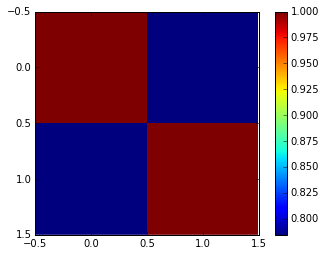

In [101]:
plt.imshow(np.corrcoef(models), interpolation='none')
plt.colorbar()